In [5]:
# -------------------------------
# Assignment 10: Advanced ANN
# Credit Card Fraud Detection (Tabular Data)
# -------------------------------

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from tkinter import Tk
from tkinter.filedialog import askopenfilename

In [6]:
# 1️⃣ Load Dataset
Tk().withdraw()
filename = askopenfilename(title="Select your cleaned CSV")
df = pd.read_csv(filename)

# Drop unnecessary columns
columns_to_drop = ['TransactionID', 'TransactionDate']
columns_to_drop = [col for col in columns_to_drop if col in df.columns]
df = df.drop(columns=columns_to_drop)

# Features & target
X = df.drop('Class', axis=1)
y = df['Class']

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
# 2️⃣ Build Advanced ANN
# More layers, more neurons, relu activation, higher iterations
model = MLPClassifier(
    hidden_layer_sizes=(64,32,16),  # 3 hidden layers
    activation='relu',
    solver='adam',
    max_iter=300,
    random_state=42
)

model.fit(X_train_scaled, y_train)
print("Advanced ANN training completed.")

Advanced ANN training completed.


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     17033
           1       0.93      0.86      0.89        29

    accuracy                           1.00     17062
   macro avg       0.96      0.93      0.95     17062
weighted avg       1.00      1.00      1.00     17062

ROC-AUC Score: 0.9799132313136568


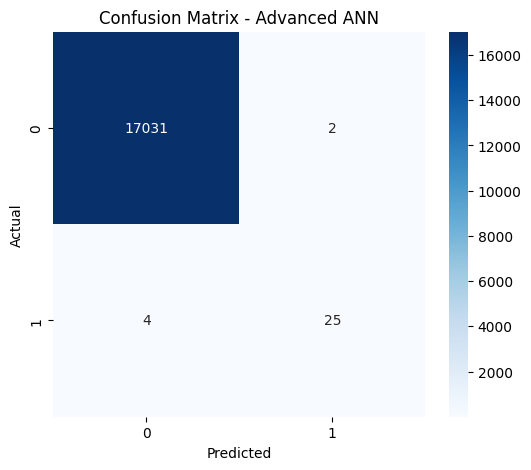

In [8]:
# 3️⃣ Evaluate Advanced ANN
y_pred = model.predict(X_test_scaled)
y_pred_prob = model.predict_proba(X_test_scaled)[:,1]

# Metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC-AUC Score:", roc_auc)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Advanced ANN")
plt.show()